In [1]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import random_split
import torch.nn.functional as F
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(42)

c:\Users\Chigerwe\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = ImageFolder(root='C:/Users/Chigerwe/Desktop/ml&nn/african animals dataset/', transform=transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()]))

In [3]:
dataset_size = len(dataset)
dataset_size

43709

In [4]:
classes = dataset.classes
classes

['antelope',
 'badger',
 'bat',
 'bee',
 'beetle',
 'boar',
 'buffalo',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'crab',
 'crow',
 'dog',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'grasshopper',
 'hamster',
 'hare',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyna',
 'kangaroo',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'mosquito',
 'moth',
 'mouse',
 'orangutan',
 'owl',
 'ox',
 'parrot',
 'pig',
 'pigeon',
 'porcupine',
 'rat',
 'rhino',
 'sandpiper',
 'semi_data',
 'sheep',
 'snake',
 'sparrow',
 'squirrel',
 'swan',
 'tiger',
 'turkey',
 'wolf',
 'woodpecker',
 'zebra']

In [5]:
len(classes)

64

In [6]:
#Perform Train-Validation-Test Split
test_size = 33616
nontest_size = len(dataset) - test_size

nontest_ds, test_ds = random_split(dataset, [nontest_size, test_size])
len(nontest_ds), len(test_ds)

(10093, 33616)

In [7]:
val_size = 1000
train_size = len(nontest_ds) - val_size

train_ds, val_ds = random_split(nontest_ds, [train_size, val_size])
len(train_ds), len(val_ds)

(9093, 1000)

In [8]:
batch_size = 1280

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([1280, 3, 256, 256])


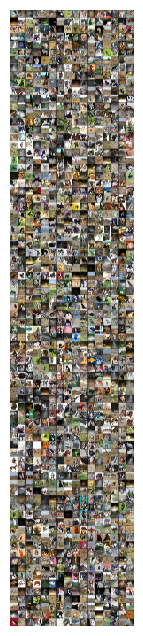

In [9]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break